# Decision Tree & Random Forest

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [11]:
#loading in building-level file

url = 'https://raw.githubusercontent.com/wshenyc/MLForCities/main/Data/building_data_final.csv'
df = pd.read_csv(url)

In [12]:
#158,185 rows corresponding to a unique building based on Borough, Block, Lot (BBL)
#116 columns 
df.shape

(158185, 115)

In [16]:
df

,bbl,county,res_units,other_units,buildings,basement_code,lot_area,comp_bbl_2017,comp_bbl_2018,comp_bbl_2019,...,building_class_W3,building_class_W4,building_class_W6,building_class_W7,building_class_W8,building_class_W9,building_class_Y4,building_class_Z4,building_class_Z9,outcome
0,3047940001,47,4,3,2,5,4000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,3047940017,47,3,0,1,2,2000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,3047940078,47,3,0,1,2,1400,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,2032790058,5,6,0,1,5,2703,0.000000,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,1011980126,61,7,0,1,1,1916,0.000000,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158180,1011980055,61,3,0,1,1,1839,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
158181,2039340058,5,3,0,1,5,2700,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
158182,3087140010,47,46,0,1,0,10000,13.673913,14.173913,0.521739,...,0,0,0,0,0,0,0,0,0,1
158183,2027860012,5,21,0,1,2,6476,0.047619,1.047619,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#of the 158,185 buildings, about 12% of buildings incurred a Class C HPD violation in 2021

df['outcome'].mean()

0.125858962607074

### 1a) Decision Tree

In [14]:
X = df.loc[:, "bbl":"building_class_Z9"]
y = df.loc[:, 'outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

dt = DecisionTreeClassifier(max_depth=10, random_state = 99)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)

# accuracy is high
accuracy= (y_predict == y_test).value_counts(normalize=True)[True]
accuracy

0.9549266689143627

In [15]:
pred_prob_all_bld= pd.concat([df.loc[:, ["bbl"]], 
                            pd.DataFrame(dt.predict_proba(df.loc[:, "bbl":"building_class_Z9"])[:, 1],
                                        columns = ["prob_vio_dt"])], axis = 1)
pred_prob_all_bld

,bbl,prob_vio_dt
0,3047940001,0.060268
1,3047940017,0.001839
2,3047940078,0.001839
3,2032790058,0.157187
4,1011980126,0.011708
...,...,...
158180,1011980055,0.001839
158181,2039340058,0.001839
158182,3087140010,0.947761
158183,2027860012,0.800000


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,11),'criterion':['gini','entropy']}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

{'criterion': 'entropy', 'max_depth': 6}
0.9747782155319025


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,11),'criterion':['gini','entropy']}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

{'criterion': 'entropy', 'max_depth': 7}
0.974231062955692


In [34]:
dt = DecisionTreeClassifier(max_depth=6,criterion='entropy')
rs=dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)

accuracy= (y_predict == y_test).value_counts(normalize=True)[True]
accuracy

0.9574553270397842

In [30]:
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

0.9747782155319025


In [37]:
df['outcome'].unique()

array([0, 1], dtype=int64)

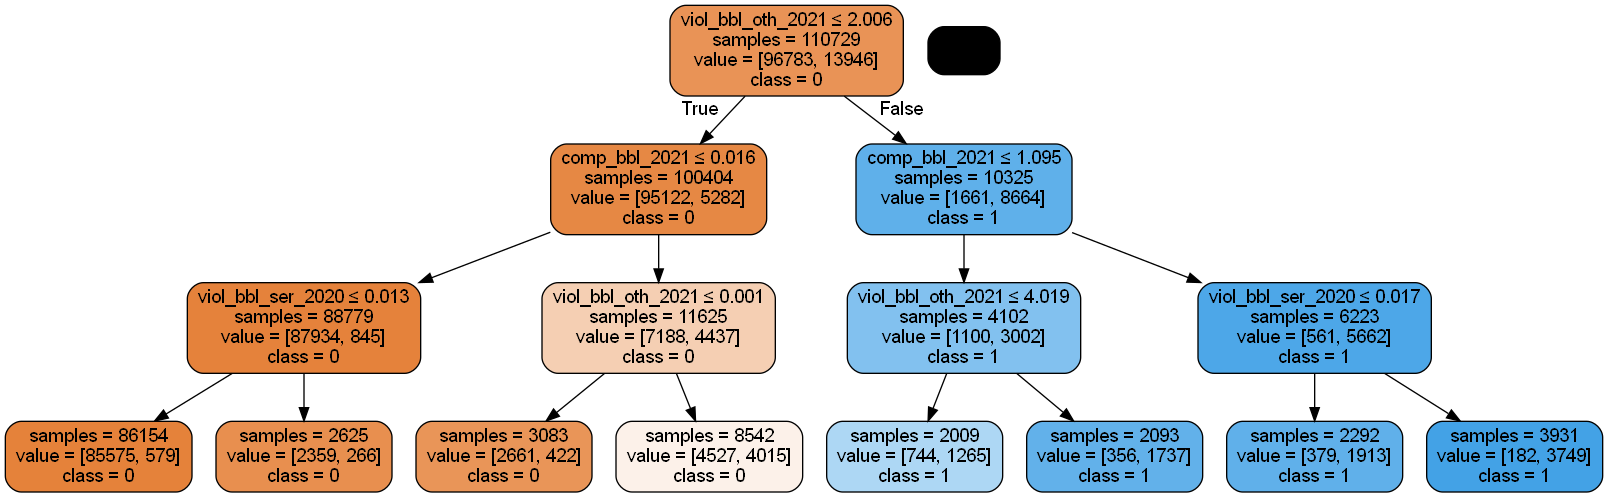

In [39]:
# your code here
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

### 1b) Random Forests

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_depth = 6, random_state = 99)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

#slightly higher accuracy than decision tree
print(roc_auc_score(y_test,pred))

0.9723532385313027


In [8]:
#adding the rf probabilities

pred_prob_all_bld = pd.concat([pred_prob_all_bld, 
                 pd.DataFrame(rf.predict_proba(df.loc[:, "bbl":"building_class_Z9"])[:, 1],
                              columns = ["prob_vio_rf"])], axis = 1)

pred_prob_all_bld

,bbl,prob_vio_dt,prob_vio_rf
0,3047940001,0.060268,0.171337
1,3047940017,0.001839,0.009545
2,3047940078,0.001839,0.010462
3,2032790058,0.157187,0.181260
4,1011980126,0.011708,0.057772
...,...,...,...
158180,1011980055,0.001839,0.010103
158181,2039340058,0.001839,0.012765
158182,3087140010,0.947761,0.741642
158183,2027860012,0.800000,0.413464


In [9]:
#writing csv for dt and rf's probabilities 

pred_prob_all_bld.to_csv("pred_prob_dt_rf.csv",index=False)